**Objective of Project:- Predicting video game sales is a crucial task for game developers, publishers, and investors in the gaming industry. The ability to forecast sales accurately helps in making informed decisions regarding marketing strategies, production budgets, and overall business planning. By leveraging historical data and machine learning techniques, video game sales prediction models can provide valuable insights into the potential success of a game and assist in optimizing various aspects of game development and marketing.**



**Steps Involved**
1. Importing Libraries
2. Loading Data
3. Reading data, discribing, details
4. Data Cleaning
5. Visualization & Analysis
6. Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Loading Data**

In [2]:
df=pd.read_csv('Video_Games_Sales.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


**Reading data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
0      False     False            False  False      False     False     False   
1      False     False            False  False      False     False     False   
2      False     False            False  False      False     False     False   
3      False     False            False  False      False     False     False   
4      False     False            False  False      False     False     False   
...      ...       ...              ...    ...        ...       ...       ...   
16714  False     False            False  False      False     False     False   
16715  False     False            False  False      False     False     False   
16716  False     False            False  False      False     False     False   
16717  False     False            False  False      False     False     False   
16718  False     False            False  False 

In [5]:
df.shape

(16719, 16)

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Name  Platform  Year_of_Release  Genre  Publisher  NA_Sales  EU_Sales  \
0      False     False            False  False      False     False     False   
1      False     False            False  False      False     False     False   
2      False     False            False  False      False     False     False   
3      False     False            False  False      False     False     False   
4      False     False            False  False      False     False     False   
...      ...       ...              ...    ...        ...       ...       ...   
16714  False     False            False  False      False     False     False   
16715  False     False            False  False      False     False     False   
16716  False     False            False  False      False     False     False   
16717  False     False            False  False      False     False     False   
16718  False     False            False  False 

<Axes: >

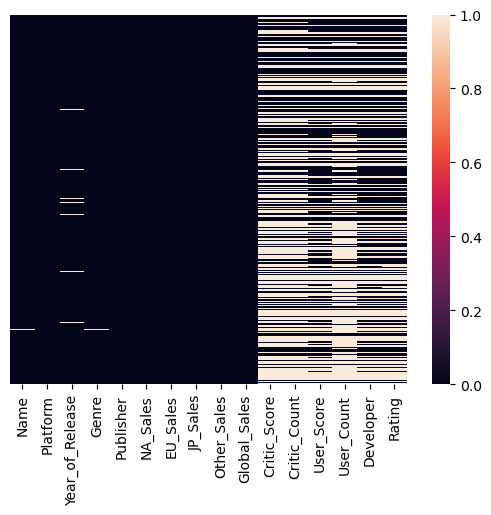

In [9]:
sns.heatmap(df.isnull(), yticklabels=False)

**Data Cleaning**

In [10]:
columns_to_drop = ['User_Score', 'User_Count', 'Developer', 'Rating', 'Critic_Count','Critic_Score']
df.drop(columns=columns_to_drop, inplace=True)
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


<Axes: >

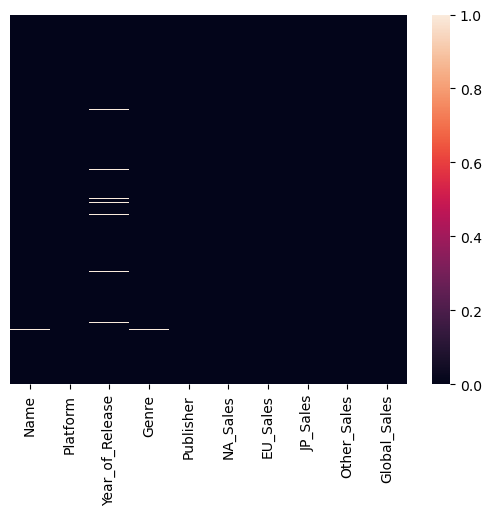

In [11]:
sns.heatmap(df.isnull(), yticklabels=False)

In [12]:
df.shape

(16719, 10)

In [13]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01


**Visualization & Analysis**

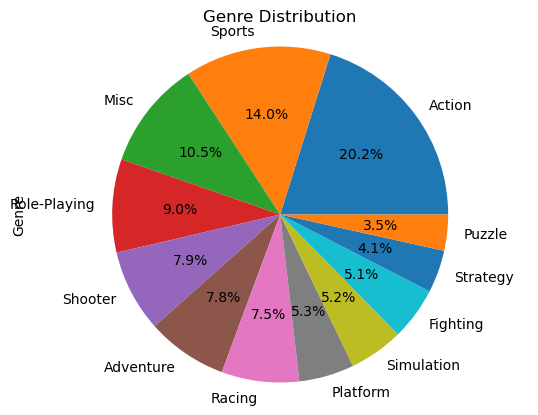

In [15]:
genre_counts = df['Genre'].value_counts()
genre_counts.plot(kind='pie', autopct='%1.1f%%', title='Genre Distribution')
plt.axis('equal') 
plt.show()

**Visualizations reveal captivating insights through a genre distribution pie chart. Notably, the "Action" genre dominates with a substantial 20.2% share of the market, followed by "Sports" at 14%, and "Misc" at 10.5%. These findings underscore the prominence of these genres while highlighting the diversity of the gaming landscape, with the remaining genres collectively constituting less than 10% of the market share.**

In [16]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [17]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


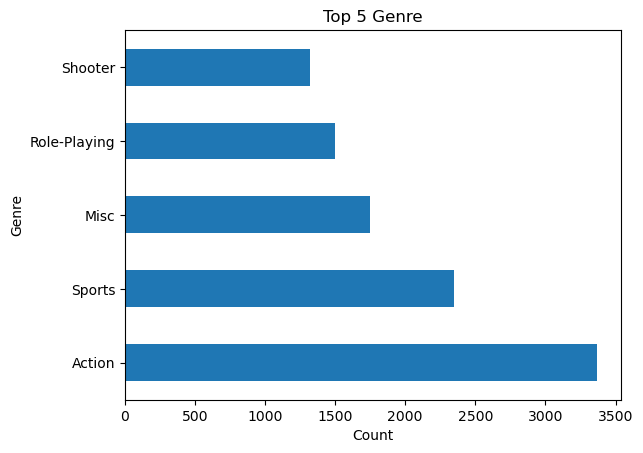

In [18]:
df['Genre'].value_counts().head(5).plot(kind='barh', title='Top 5 Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Horizontal bar graph visually summarizes genre distribution by count. It efficiently illustrates the prevalence of key genres, offering insights into their market share and industry diversity.**

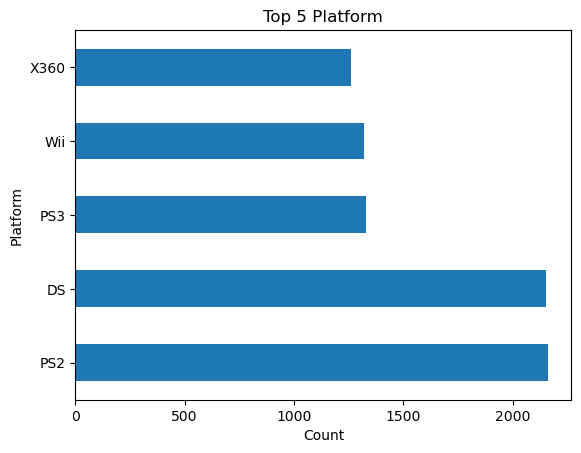

In [19]:
df['Platform'].value_counts().head(5).plot(kind='barh', title='Top 5 Platform')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()

**Horizontal bar graph reveals the top 5 platforms, with PS2, DS, and PS3 securing the leading positions. This snapshot offers a brief glimpse into the dominant platforms driving the gaming market.**

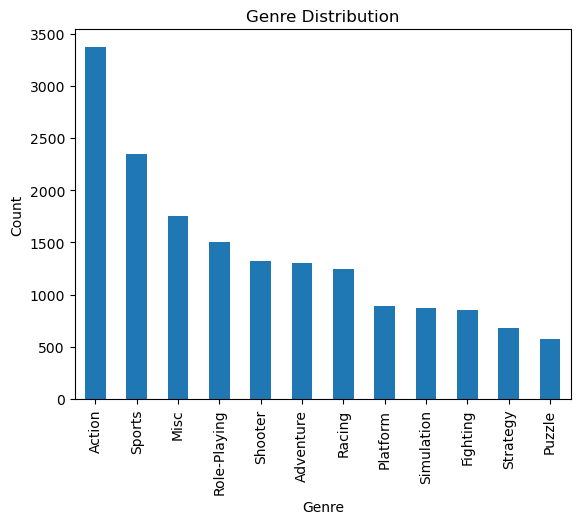

In [21]:
df['Genre'].value_counts().plot(kind='bar', title='Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

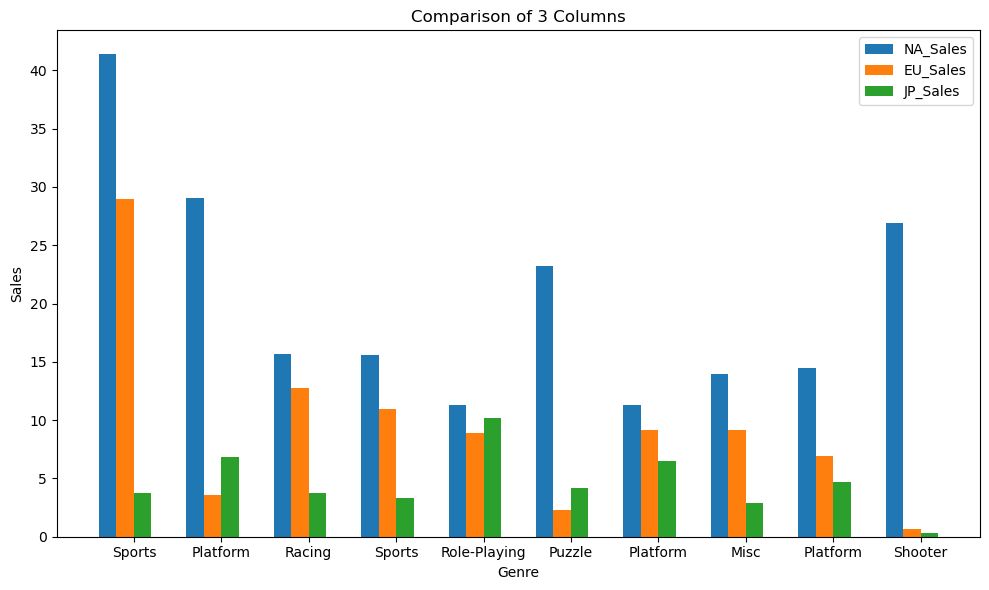

In [22]:
df = df.head(10)
plt.figure(figsize=(10, 6))

bar_width = 0.2
index = range(len(df['Genre']))
plt.bar(index, df['NA_Sales'], bar_width, label='NA_Sales', align='center')
plt.bar([i + bar_width for i in index], df['EU_Sales'], bar_width, label='EU_Sales', align='center')
plt.bar([i + 2 * bar_width for i in index], df['JP_Sales'], bar_width, label='JP_Sales', align='center')

plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Comparison of 3 Columns')
plt.xticks([i + 1.5 * bar_width for i in index], df['Genre'])

plt.legend()

plt.tight_layout()
plt.show()

**Bar Graph highlight regional preferences in gaming genres. North America favors sports and platform genres, while Europe shows high sales in sports, and Japan's preference lies in platform games. These insights inform strategic decisions for targeting specific markets effectively.**

**Conclusion**

**In our Video Game Sales Prediction project, we've completed key steps from importing and reading data to cleaning and visualization. Our insights reveal that the Action, Sports, and Misc genres dominate both in percentages and counts. Additionally, the PS2, DS, and PS3 platforms stand out as top contenders. Notably, North America leads in global sales, followed by Europe, with Japan trailing. These findings provide valuable industry insights for strategic decision-making.**